# {Natural Disasters Mitigation}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

With natural disasters always seem to be popping up nowadays, so how does one mitigate for a natural disasters?

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

What are mitigation measures in place for disasters for what disasters?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->
My hypothesis is that there may be multipule methods in place for disasters, however there may be one option that works the best for Severe Storms.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

FEMA Mitigation ideas and perpare - https://www.fema.gov/sites/default/files/2020-06/fema-mitigation-ideas_02-13-2013.pdf
I will be using this to have a better understanding of what ways there are to help perpare for a natural disaster and what to do if one does happen.

Hazard Mitigation Assistance Mitigated Properties - https://www.fema.gov/openfema-data-page/hazard-mitigation-assistance-mitigated-properties-v3
I will be using this dataset to help explain the ways to react to a natural disaster.

FEMA Web Declaration Areas - https://www.fema.gov/openfema-data-page/fema-web-declaration-areas-v1
I will be using this dataset to help expand the dataset from above with dates of each disaster. I plan to use the disaster number found in this dataset to and the one above to join and connect the 2.

OpenFEMA Dataset: Disaster Declarations Summaries- https://www.fema.gov/openfema-data-page/disaster-declarations-summaries-v2
I will being using this dataset to try and help me fill in gaps that may be missing and to help determine what the type of the disaster that took place.

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

My approach is simple. The datasets provide information on what was done to mitigate what was done at verious locations what where hit by some type of nature disaster. I plan on showing what tactics where used and see if I can compare what tactics may be more effective when dealing with a natural disaster. 

## Checking to See if any Duplicate or Missing Values

In [11]:
import pandas as pd

HMFilePath = 'Data/FEMA_DataSets/HazardMitigationAssistanceMitigatedProperties (2).csv'
HMData = pd.read_csv(HMFilePath)

# Check for duplicates
HMDuplicates = HMData[HMData.duplicated()]
if not HMDuplicates.empty:
    print("Duplicate rows found:")
    print(HMDuplicates)
else:
    print("No duplicate rows found.")

# Check for missing values
HMMissingValues = HMData.isnull().sum()
if HMMissingValues.sum() > 0:
    print("Columns with missing values:")
    print(HMMissingValues[HMMissingValues > 0])
else:
    print("No missing values found.")


No duplicate rows found.
Columns with missing values:
disasterNumber       6019
propertyAction       3107
structureType        5514
typeOfResidency     25976
foundationType       6805
county               1062
city                    2
state                  24
stateNumberCode        24
region                 24
zip                     8
damageCategory      45847
actualAmountPaid    24367
dtype: int64


In [10]:
import pandas as pd

FWFilePath = 'Data/FEMA_DataSets/FemaWebDeclarationAreas.csv'
FWData = pd.read_csv(FWFilePath)

# Check for duplicates
FWDuplicates = FWData[FWData.duplicated()]
if not FWDuplicates.empty:
    print("Duplicate rows found:")
    print(FWDuplicates)
else:
    print("No duplicate rows found.")

# Check for missing values
FWMissingValues = FWData.isnull().sum()
if FWMissingValues.sum() > 0:
    print("Columns with missing values:")
    print(FWMissingValues[FWMissingValues > 0])
else:
    print("No missing values found.")

No duplicate rows found.
Columns with missing values:
entryDate           17
closeoutDate    134877
dtype: int64


In [9]:
import pandas as pd

DDFilePath = 'Data/FEMA_DataSets/DisasterDeclarationsSummaries.csv'
DDData = pd.read_csv(DDFilePath)

# Check for duplicates
DDDuplicates = DDData[DDData.duplicated()]
if not DDDuplicates.empty:
    print("Duplicate rows found:")
    print(DDDuplicates)
else:
    print("No duplicate rows found.")

# Check for missing values
DDMissingValues = DDData.isnull().sum()
if DDMissingValues.sum() > 0:
    print("Columns with missing values:")
    print(DDMissingValues[DDMissingValues > 0])
else:
    print("No missing values found.")


No duplicate rows found.
Columns with missing values:
incidentEndDate           533
disasterCloseoutDate    16009
lastIAFilingDate        46963
dtype: int64


Since there are a may missing values in both datasets, I  have decided to keep them due to the fact I don't believe that they will being bring any harm to the data. On the other hand it is great to see that there is no duplicate data! I will not being checking the other 

## Before we get started, what is a Natural Disaster?
A natural disaster is the highly harmful impact on a society or community following a natural hazard event. Some examples of natural hazard events include: flooding, drought, earthquake, tropical cyclone, lightning, tsunami, volcanic activity, wildfire.

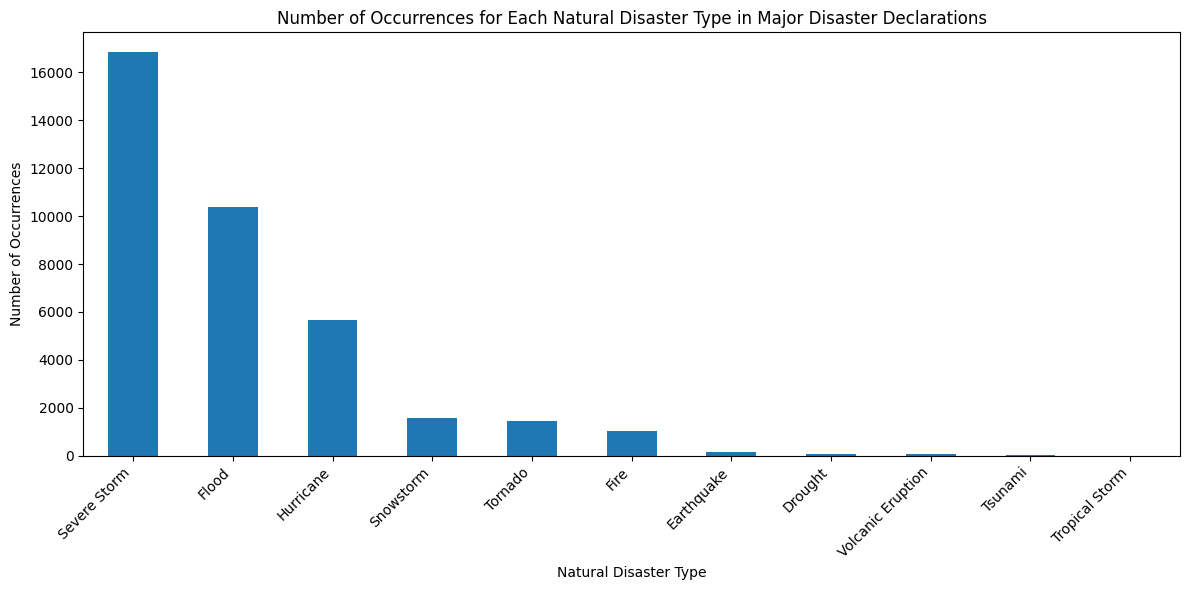

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

filePath = 'data/FEMA_DataSets/DisasterDeclarationsSummaries.csv'
data = pd.read_csv(filePath)

# Define a list of incident types considered as natural disasters
natural_disasters = [
    'Hurricane', 'Tornado', 'Severe Storm', 'High Water', 'Wind-driven Water',
    'Tidal Wave', 'Tsunami', 'Tropical Storm', 'Earthquake', 'Volcanic Eruption', 'Landslide',
    'Mudslide', 'Snowstorm', 'Drought', 'Fire', 'Flood'
]

# Filter data to include only Major Disaster Declarations (declarationType = 'DR') caused by nature
nature_major_disasters = data[(data['declarationType'] == 'DR') & (data['incidentType'].isin(natural_disasters))]

# Count occurrences of each incident type within Major Disaster Declarations caused by nature
incident_counts = nature_major_disasters['incidentType'].value_counts()

plt.figure(figsize=(12, 6))
incident_counts.plot(kind='bar')
plt.title('Number of Occurrences for Each Natural Disaster Type in Major Disaster Declarations')
plt.xlabel('Natural Disaster Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [45]:
import pandas as pd

# Load the CSV files into Pandas DataFrames
file1 = 'data/FEMA_DataSets/DisasterDeclarationsSummaries.csv'
file2 = 'data/FEMA_DataSets/HazardMitigationAssistanceMitigatedProperties (2).csv'

data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)

# Perform a left join based on 'Disasternumber'
merged_data = pd.merge(data1, data2, on='disasterNumber', how='left')

# Display the merged data or perform further operations
print(merged_data)


        femaDeclarationString  disasterNumber state_x declarationType  \
0                  FM-5389-AZ            5389      AZ              FM   
1                  FM-5389-AZ            5389      AZ              FM   
2                  FM-5464-RI            5464      RI              FM   
3                  FM-5463-KS            5463      KS              FM   
4                  FM-5462-NE            5462      NE              FM   
...                       ...             ...     ...             ...   
2960450            DR-1008-CA            1008      CA              DR   
2960451            DR-1008-CA            1008      CA              DR   
2960452            DR-1008-CA            1008      CA              DR   
2960453            DR-1008-CA            1008      CA              DR   
2960454            DR-1008-CA            1008      CA              DR   

                  declarationDate  fyDeclared incidentType  \
0        2021-06-06T00:00:00.000Z        2021         Fire   

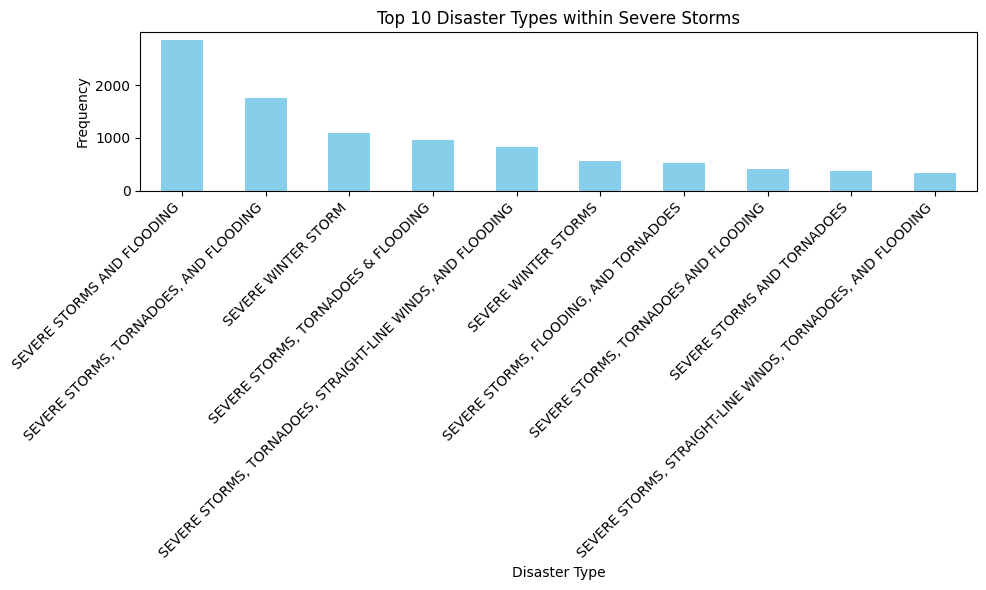

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'data/FEMA_DataSets/DisasterDeclarationsSummaries.csv'
data = pd.read_csv(file_path)

# Filter the data for 'Severe Storm(s)'
severe_storm_data = data[data['incidentType'] == 'Severe Storm']

# Assuming 'declarationTitle' contains different disaster types within 'Severe Storm(s)'
disaster_type_counts = severe_storm_data['declarationTitle'].value_counts()

# Selecting top N categories to display
top_categories = 10  # Adjust the number of top categories to display
top_disaster_types = disaster_type_counts.head(top_categories)

# Plotting a bar plot for the top categories
plt.figure(figsize=(10, 6))
top_disaster_types.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_categories} Disaster Types within Severe Storms')
plt.xlabel('Disaster Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


NameError: name 'cities_by_count' is not defined

<Figure size 1000x600 with 0 Axes>

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [1]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 2584 bytes to source.py
